## MEMA Inter-subject analysis

This notebook will 
- Process and generate reports for all the dataset following procedure detailed in Bruxism detection
- Display several metrics for all patients of the datasets
- Display group analysis differences between tinnitus overnight increase patients and stable overnight patients (for tinnitus masking volume and VAS scales)
- Display correlation plots between tinnitus evolution overnight and number of bruxisme episodes per hour (for tinnitus masking volume and VAS scales)

In [1]:
import os
PATH = os.getcwd() 
import sys
sys.path.append(PATH + '/../')
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import scipy

print("config loaded")


config loaded


In [2]:
#Setting parameters
results_file = "data/reports_and_datas_MEMA.pk"
info_file = "data/data_info.csv"

# PART 1 Compute Results
Skip to Part 2 if results files has been computed already

## Processing of the dataset and report generation

In [3]:
# change --overwrite to True if you want to force to recompute the results
%run ../compute_results.py --mema True --overwrite True

config loaded.
Performs Bruxism: <False>
Performs MEMA: <True>
Will overwrite existing results: <True>
parameters set
Files processed: 
1AC26_cohort2.edf (sleep labels 

non uniform interval (count: [(7.0, 1), (22.0, 1), (23.0, 1), (30.0, 1147)]), taking median: 30.0
start time, file: 23:22:38 labels: 28/08/2020 23:22:38


, loaded) preprocess... Bruxism(skipped) MEMA(done) 

NameError: name 'labels_1s_extension' is not defined

# Part 2 Load and Analysis Results
Part 1 is optional if the .pk has been saved

### Loading results

In [4]:
results = pd.read_pickle(results_file).to_dict()
THR_classif = np.array(results[list(results.keys())[0]]["THR_classif"])

data_info = pd.read_csv(info_file, sep=",").query('mema == 1 & included == 1 & session == "1" ')
#data_info = pd.read_csv(info_file, sep=";").query('mema == 1 & included == 1 & subject == "1SL21" & session != "6" ')

print(f"Valid files for mema {data_info.shape[0]}")
print(data_info[["filename", "condition"]])
results_updated = dict()
for filename in results.keys():
    if filename in data_info["filename"].values:
        results_updated[filename] = results[filename]
results = results_updated

Valid files for mema 27
              filename    condition
4   1DA15_nuit_hab.edf  habituation
9   1GB18_nuit_hab.edf  habituation
22  1RA17_nuit_hab.edf  habituation
28    1HB20_nuit_1.edf  habituation
36    1SL21_nuit_2.edf  habituation
40    1UC22_nuit_1.edf  habituation
42    2GA06_nuit_1.edf      control
43    2SJ03_nuit_1.edf      control
49    2LS05_nuit_1.edf      control
50    2CT04_nuit_1.edf      control
57   1ZN04_cohort2.edf       batch2
58   1HS25_cohort2.edf       batch2
59   1PA31_cohort2.edf       batch2
60   3NS01_cohort2.edf       batch2
61   1CB23_cohort2.edf       batch2
62   1RF29_cohort2.edf       batch2
63   1GF14_cohort2.edf       batch2
64   1DM32_cohort2.edf       batch2
65   3BS04_cohort2.edf       batch2
66   3TR07_cohort2.edf       batch2
67   3KB06_cohort2.edf       batch2
68   1NS30_cohort2.edf       batch2
69   1AC26_cohort2.edf       batch2
70   3CL02_cohort2.edf       batch2
71   3TS03_cohort2.edf       batch2
72   3HS08_cohort2.edf       batch2
73  

## Data visualization for the entire cohort for nb MEMA episodes per hour as a function of THR_classif value : 

In [5]:
def plot_inter_subjects(results, value): 
    for filename in results.keys():
        y_axis=[]
        for report in results[filename]["reports"]:
            y_axis.append(report[value])
        plt.plot(THR_classif[:,1], y_axis, label=filename)
    plt.title('MEMA scoring')
    plt.xlabel('Threshold for classification')
    plt.ylabel(value)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

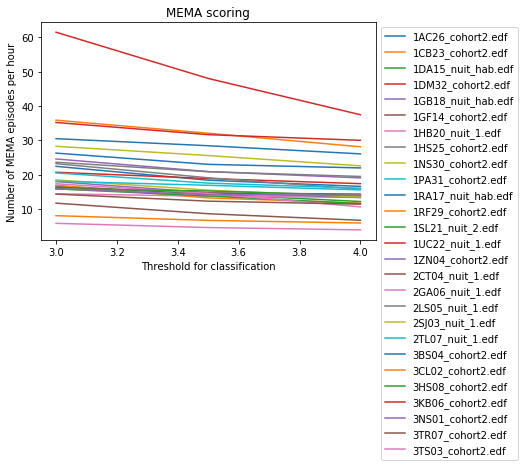

In [6]:
plt.close("all")
plt.figure()
value = "Number of MEMA episodes per hour"
plot_inter_subjects(results, value)

## Data visualization for the entire cohort for nb MEMA bursts as a function of THR_classif value : 

<Figure size 432x288 with 0 Axes>

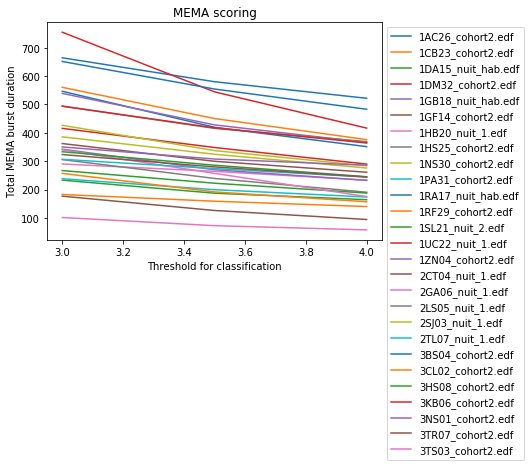

In [7]:
plt.figure()
plt.figure()
value = "Total MEMA burst duration"
plot_inter_subjects(results, value)

In [26]:
## Comparing 

In [42]:
# format reports
reports = None
for filename in results.keys():
    report = pd.DataFrame(results[filename]["reports"])
    report["THR_classif"] = THR_classif[:,1]
    report["filename"] = filename
    if reports is None:
        reports = report
    else:
        reports = reports.append(report, ignore_index=True)

        
import math     
def map_category(x):
    if x < (-0.1):
        return "decrease"
    elif x > (0.1):
        return "increase"
    elif math.isnan(x):
        return "control"
    else:
        return "stable"
#putting away damaged recordings
var = data_info["mask_delta"].apply(map_category)
var[70] = "control" #3CL02
var[71] = "control" #3TS03
var[61] = "control" #1CB23
#var[65] = "control" #3BS04
#var[67] = "control" #3KB06
#var[40] = "control" #1UC22

data_info["category"] = var
reports = reports.merge(data_info, on="filename")

In [43]:
#Preparing values for correlation scatter plots
    
print("Nb_patients in each group : ")
for category in list(data_info['category'].unique()):
    print(f"Tinnitus {category} : {(data_info['category']==category).sum()}, {(list(data_info[data_info['category']==category]['subject']))}")

report_mean = reports.groupby(['category', 'THR_classif']).mean()
report_std =  reports.groupby(['category', 'THR_classif']).std()


Nb_patients in each group : 
Tinnitus decrease : 9, ['1DA15', '1HB20', '1SL21', '1ZN04', '3NS01', '3BS04', '3TR07', '3KB06', '3HS08']
Tinnitus increase : 8, ['1GB18', '1RA17', '1UC22', '1HS25', '1GF14', '1DM32', '1NS30', '1AC26']
Tinnitus control : 8, ['2GA06', '2SJ03', '2LS05', '2CT04', '1CB23', '3CL02', '3TS03', '2TL07']
Tinnitus stable : 2, ['1PA31', '1RF29']


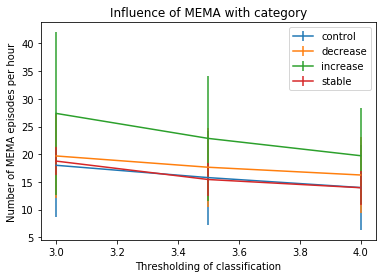

In [44]:
#Displaying
plt.figure()
value = "Number of MEMA episodes per hour"
for category in list(report_mean.index.get_level_values(0).unique()):
    plt.errorbar(THR_classif[:,1],report_mean.loc[category][value], report_std.loc[category][value], label = category)
plt.title("Influence of MEMA with category" )
plt.xlabel('Thresholding of classification')
plt.ylabel(value)
plt.legend()

In [45]:
quantitative_variables = list(results[list(results.keys())[0]]["reports"][0].keys())[0:-9] #(remove power ratio a sleep analysis)
print(f'variables: {quantitative_variables}')
effect_variable = ["mask_delta", "mask_per", "VAS_I_delta", "VAS_I_per", "VAS_L_delta", "VAS_L_per"]
#reports["Power Ratio"] = reports["Power Ratio"].apply(sum)

variables: ['Clean MEMA duration', 'Total MEMA burst duration', 'Total number of MEMA burst', 'Number of MEMA bursts per hour', 'MEMA episode NREM count', 'MEMA episode NREM ratio', 'Total number of MEMA episodes', 'Number of MEMA bursts per episode', 'Number of MEMA episodes per hour', 'Mean duration of MEMA episode']


C:\Users\Zeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


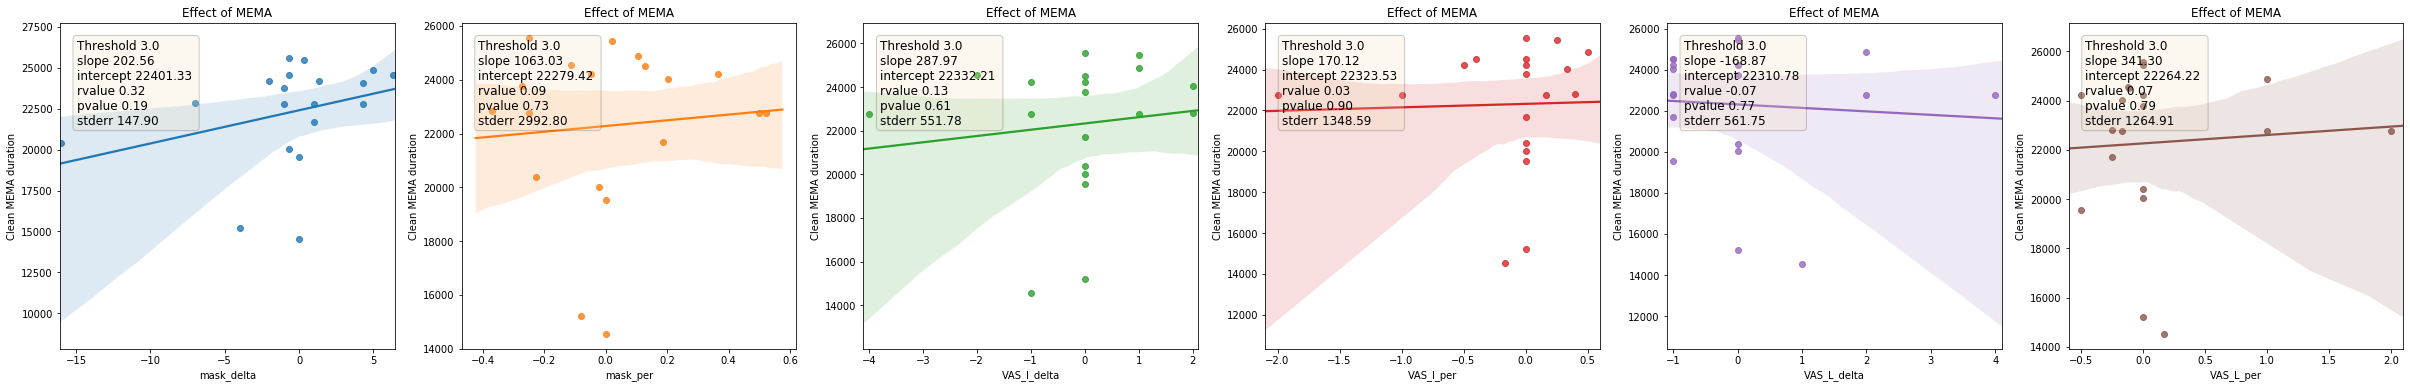

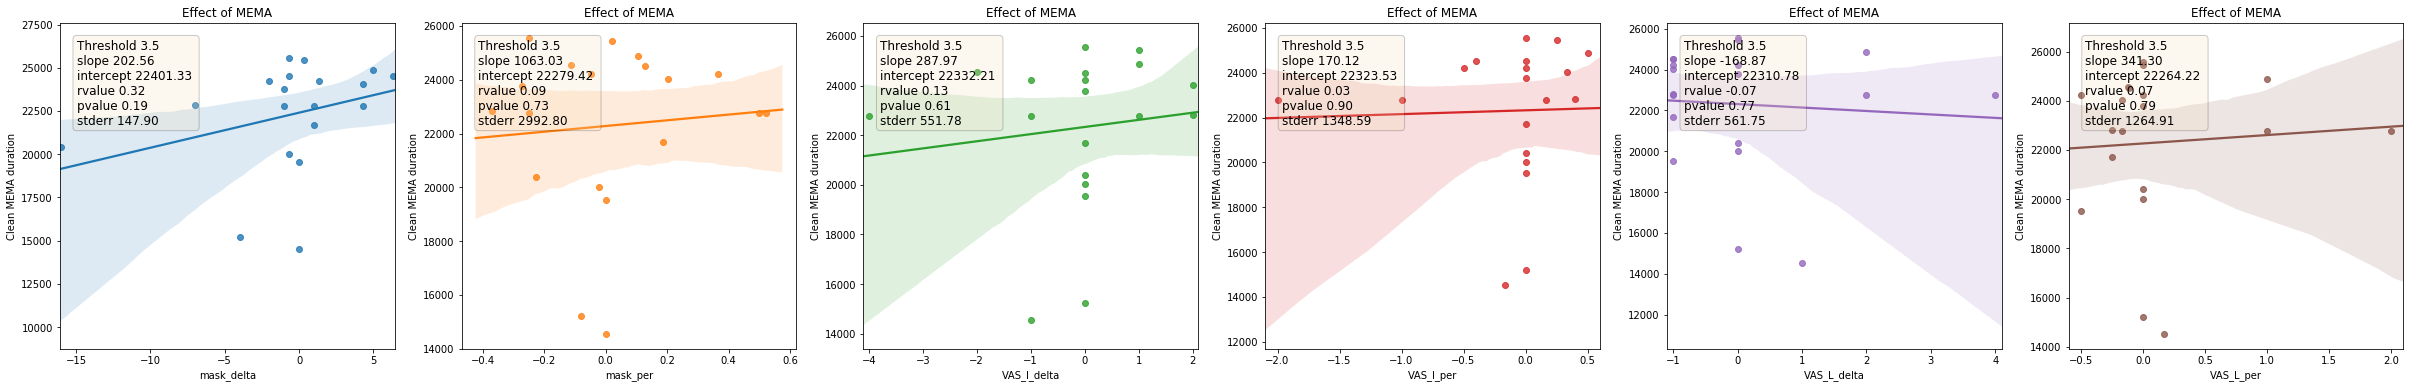

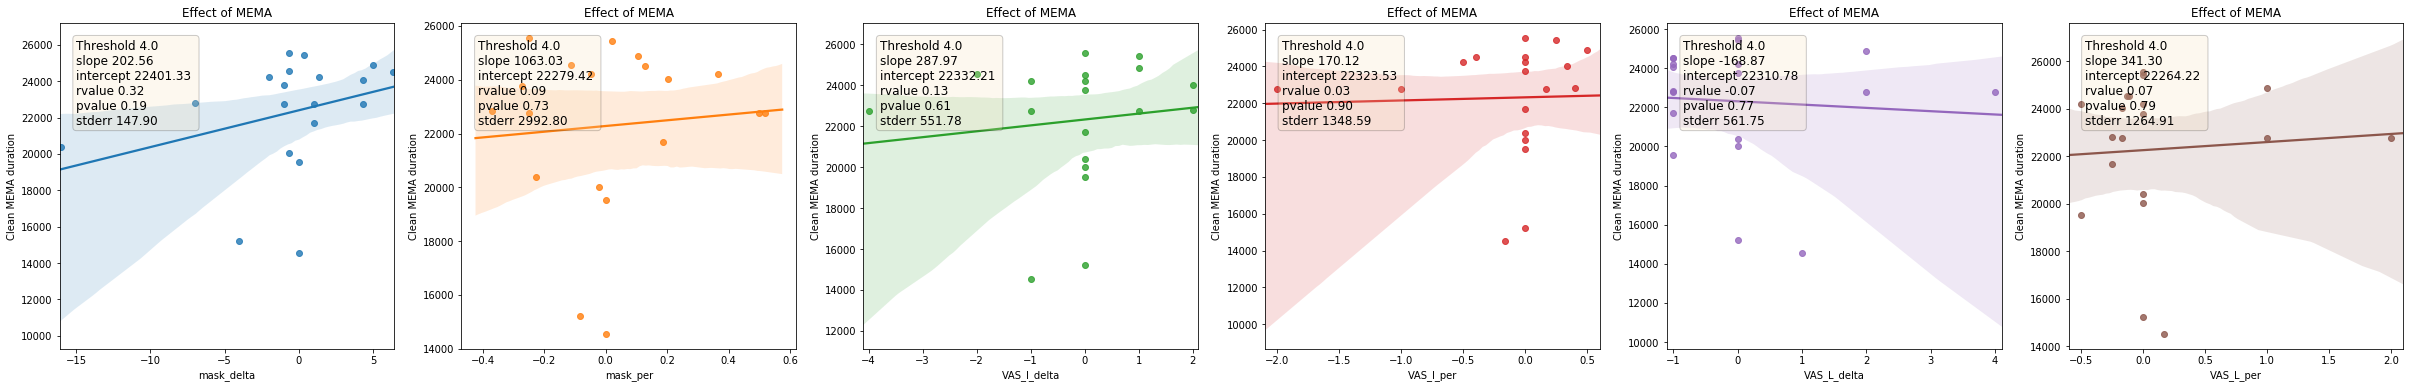

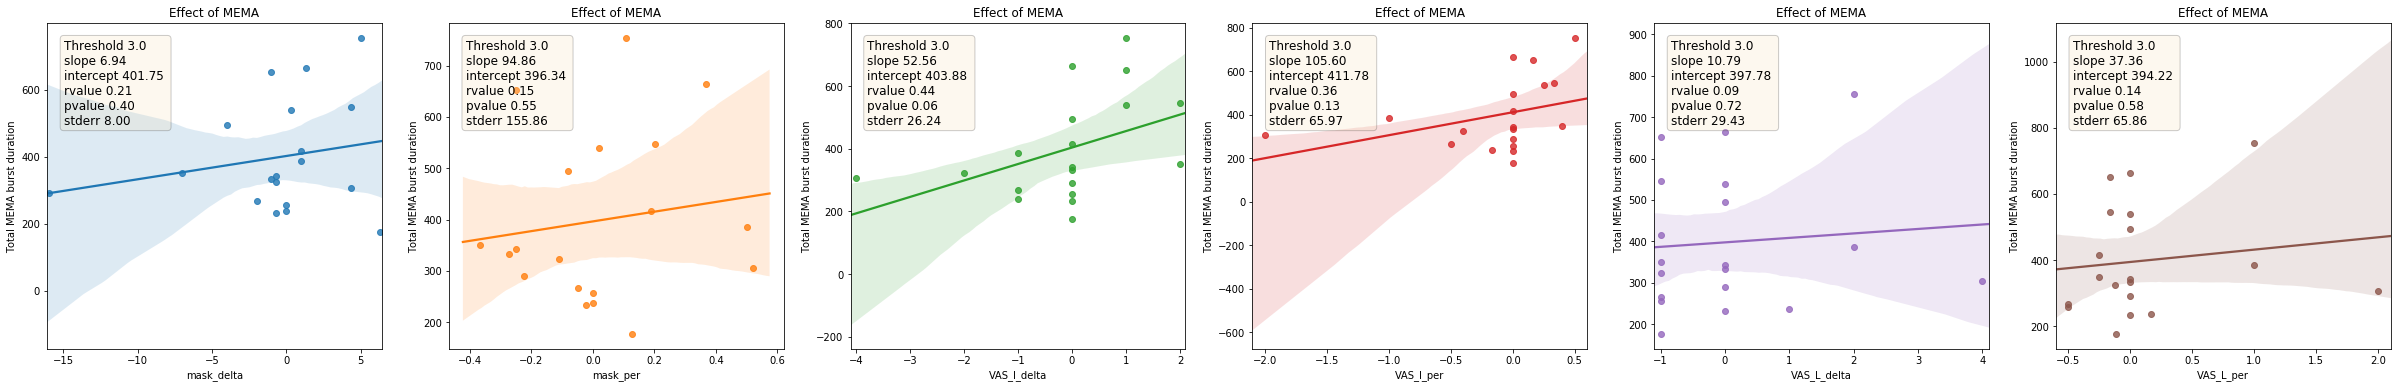

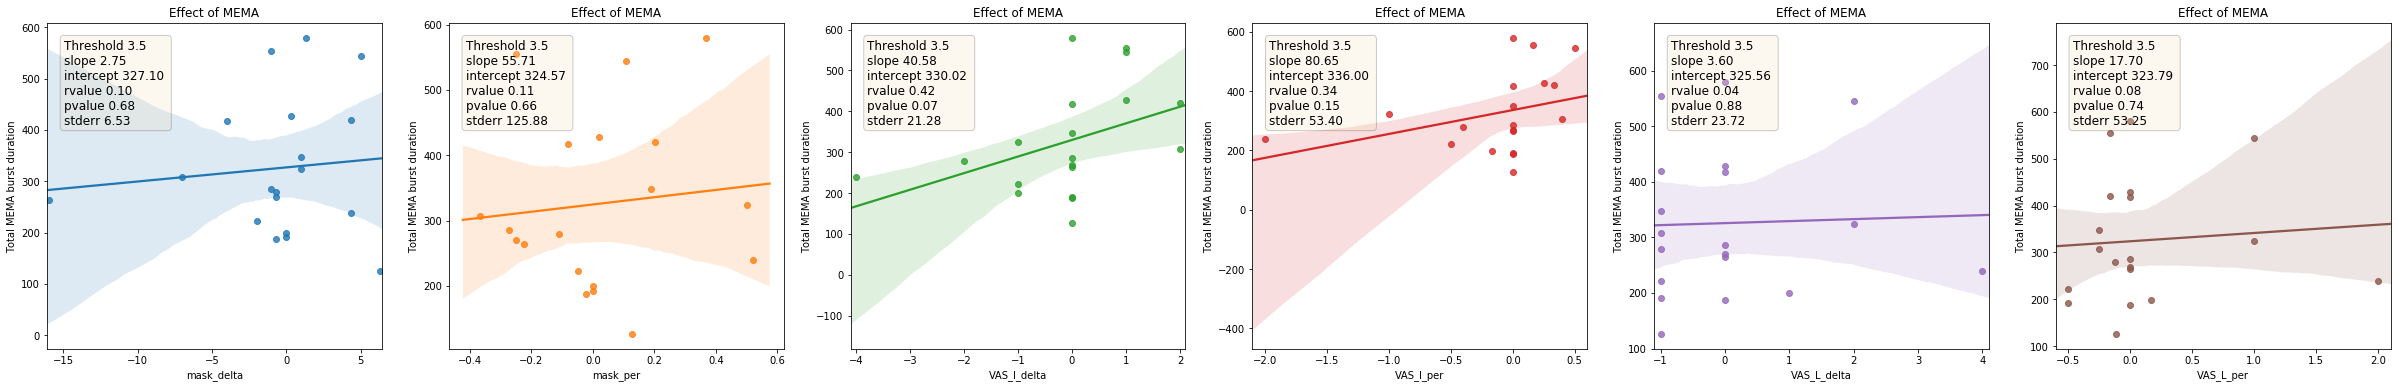

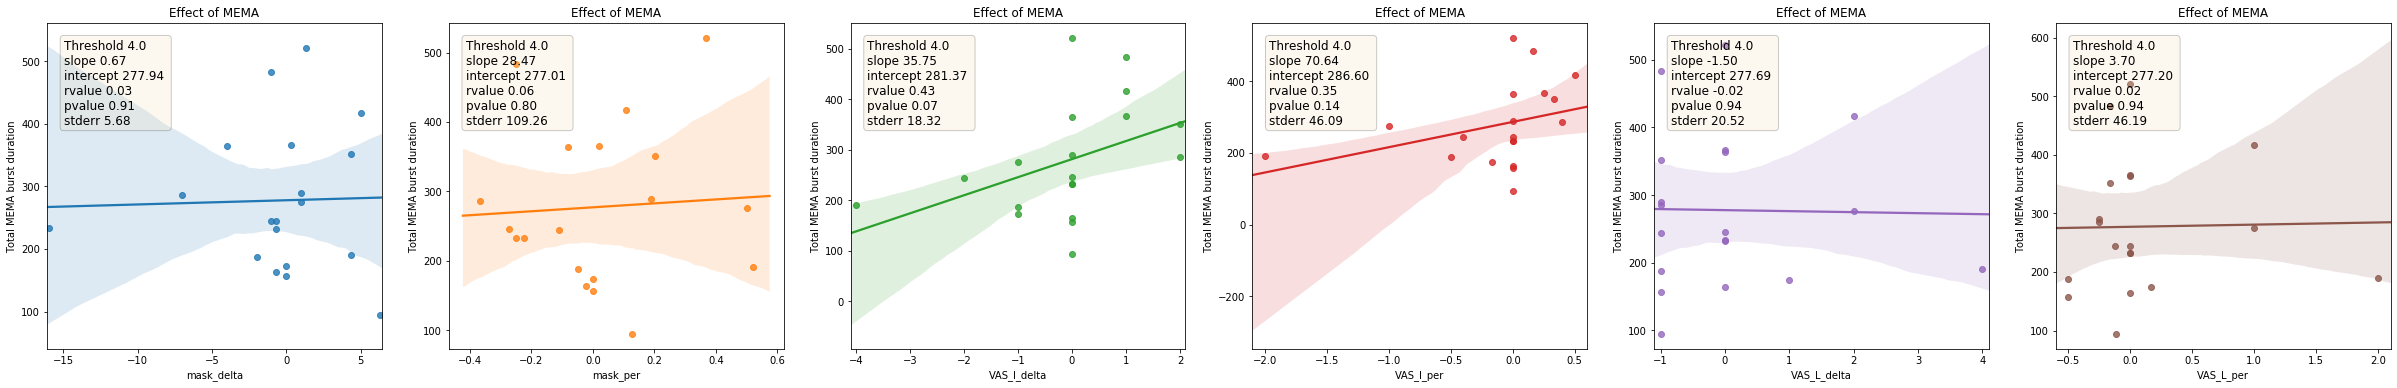

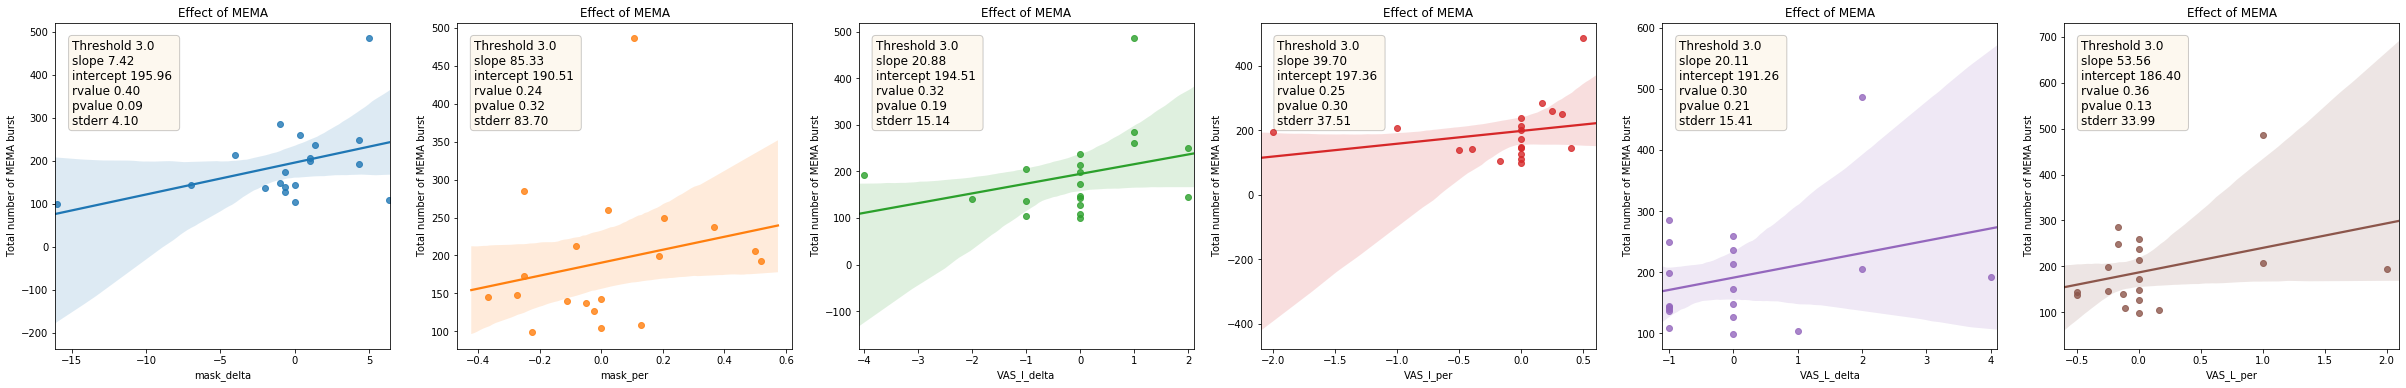

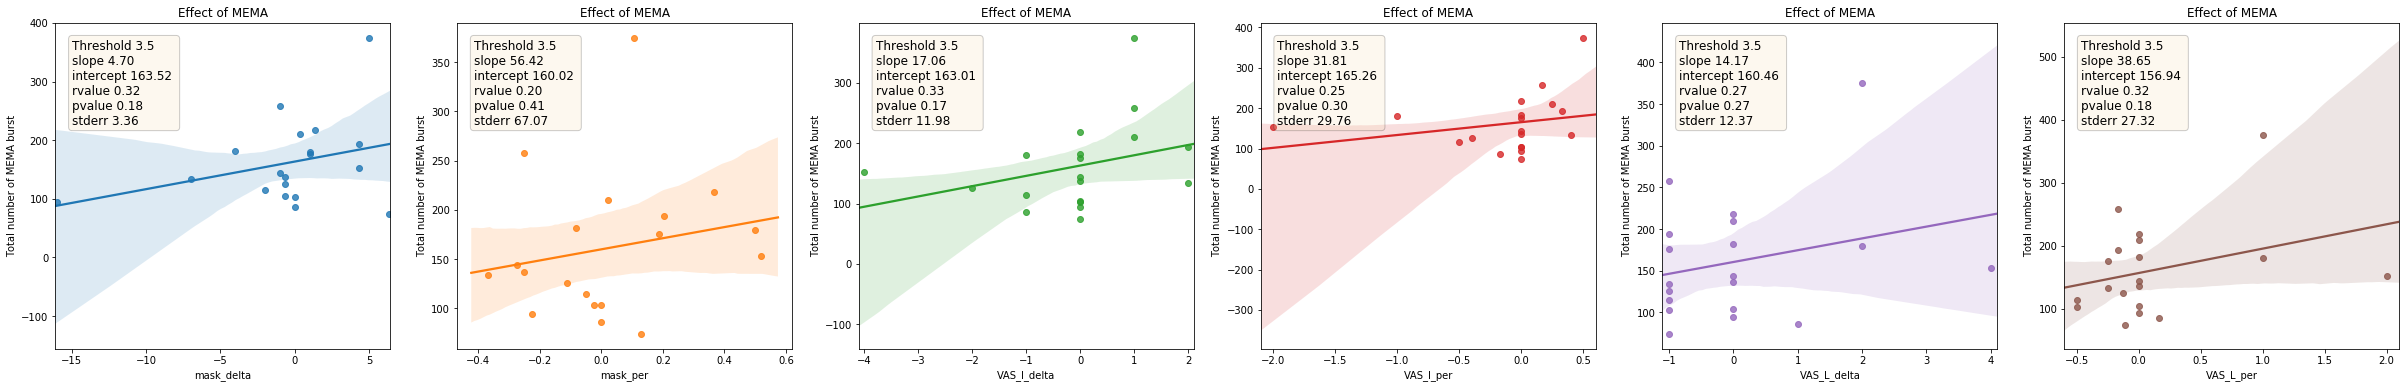

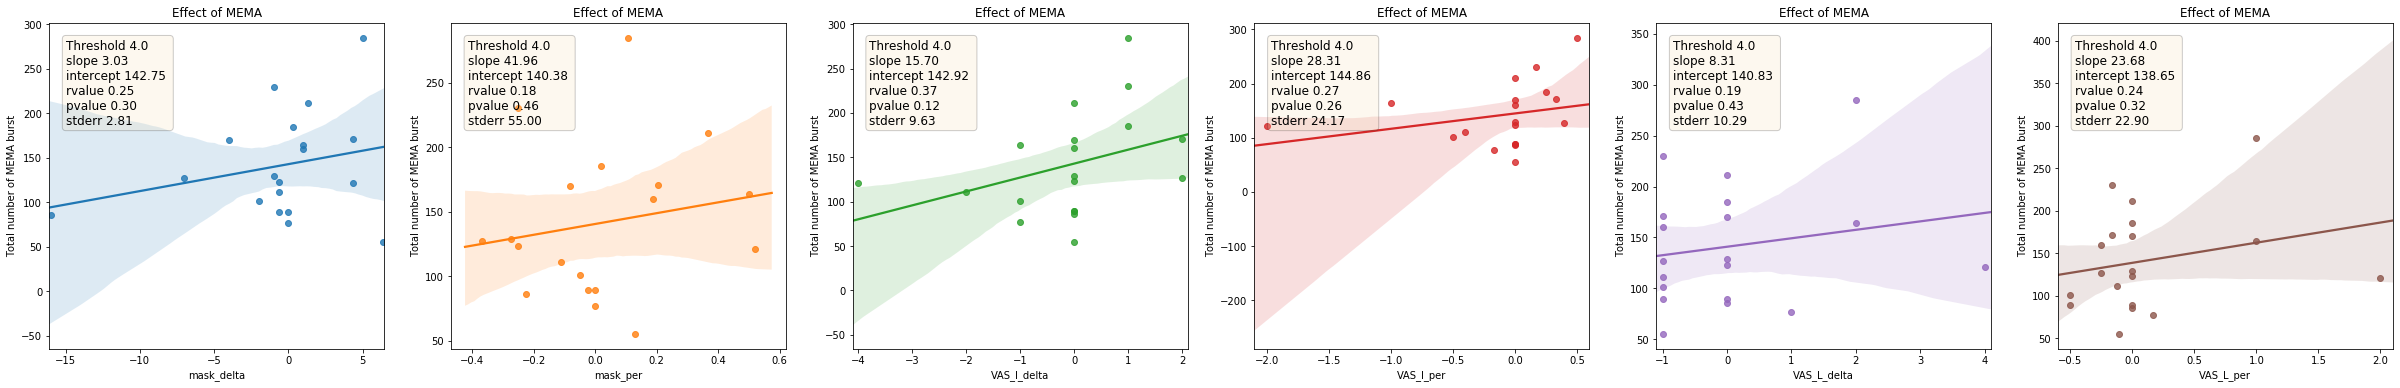

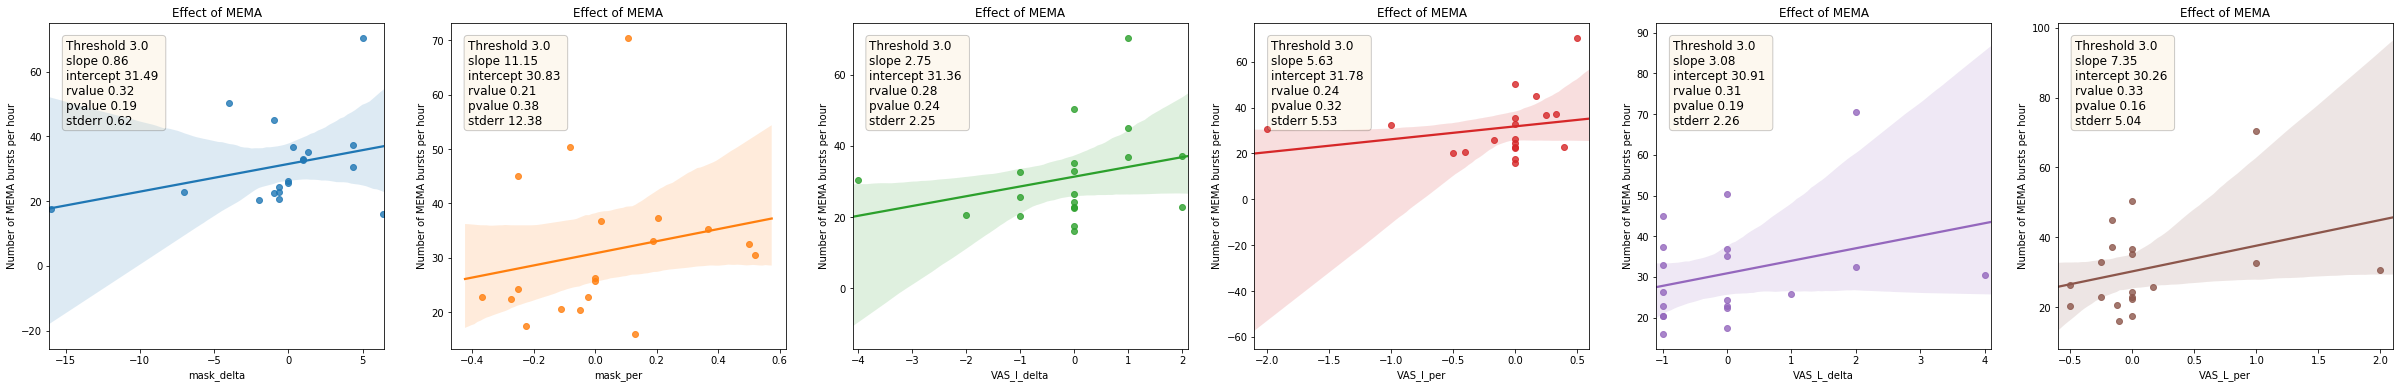

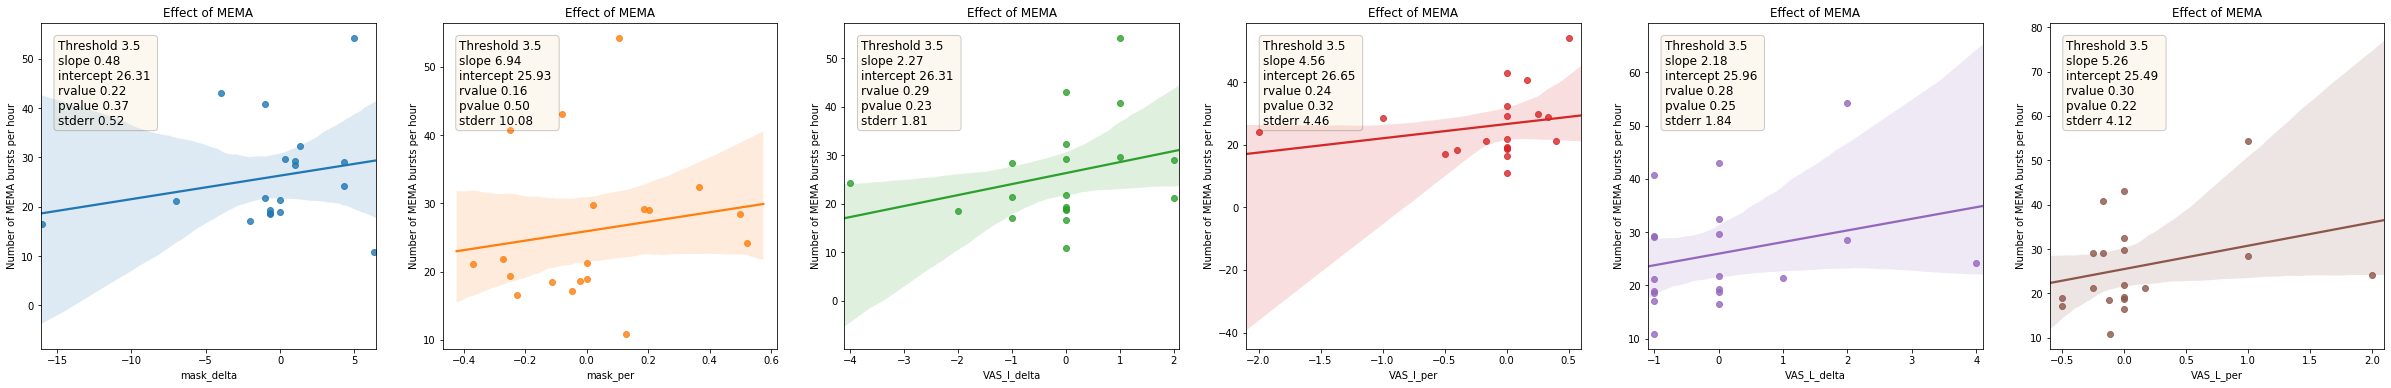

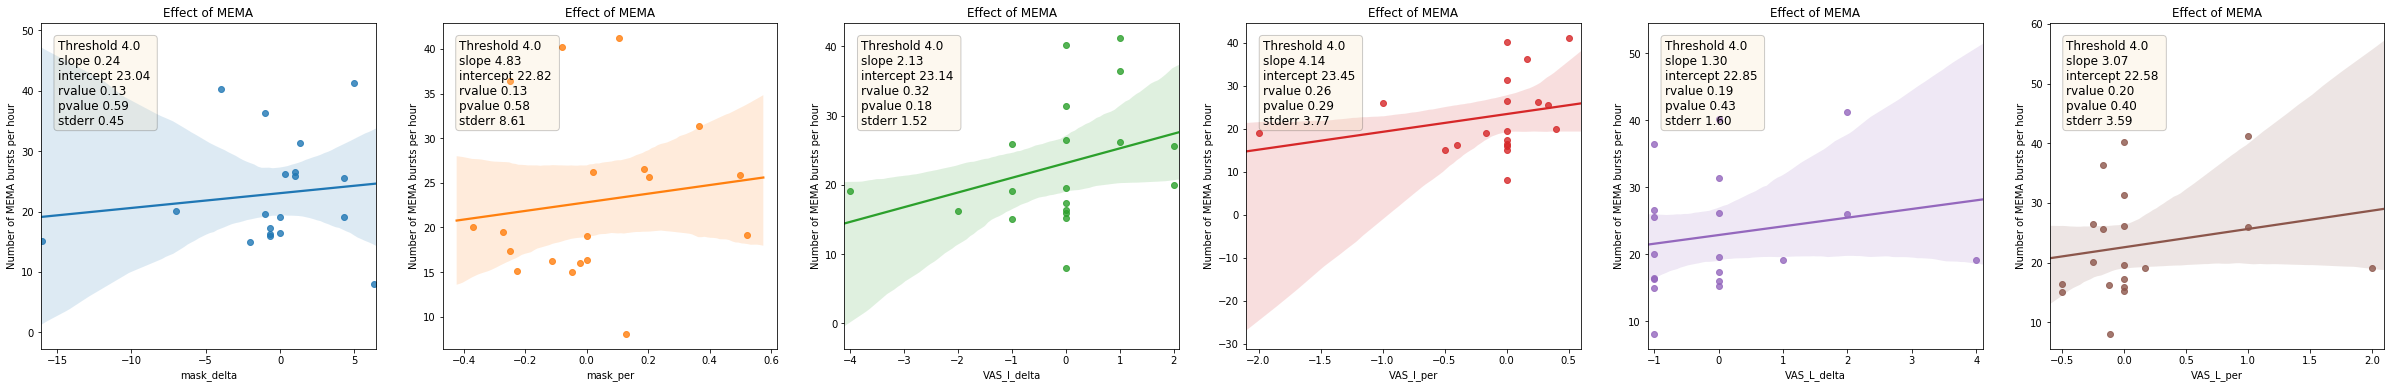

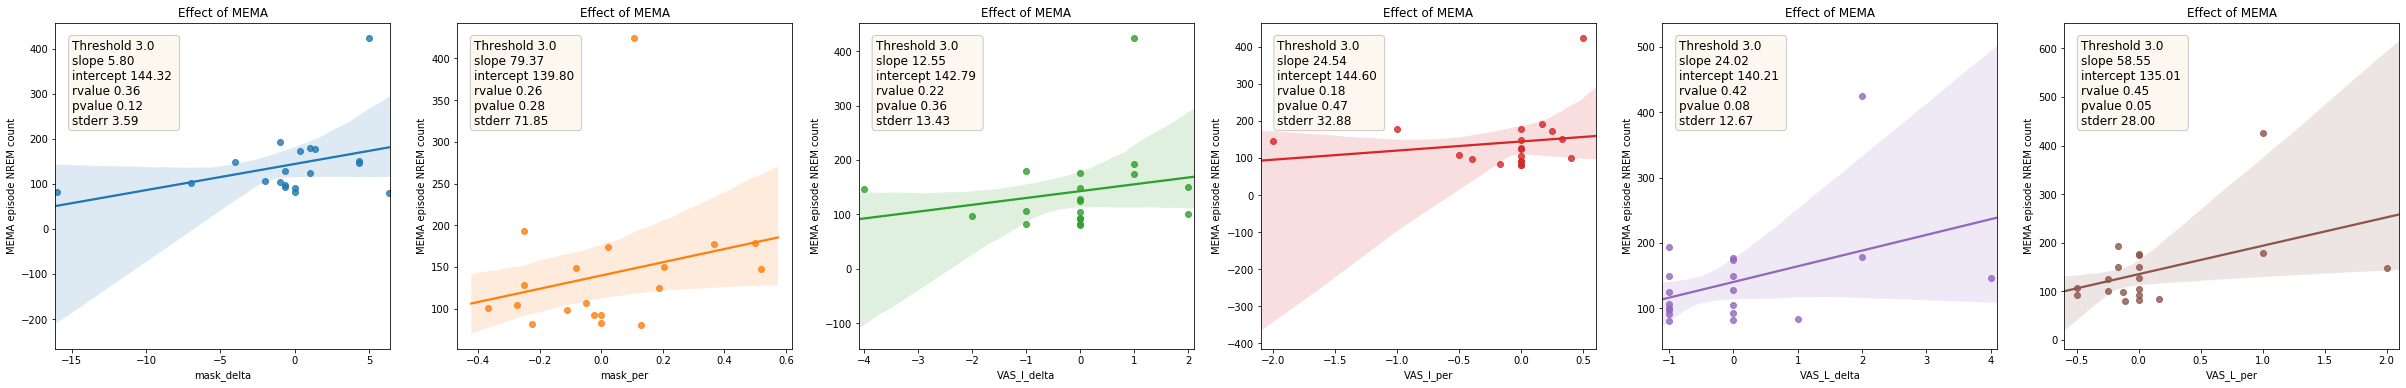

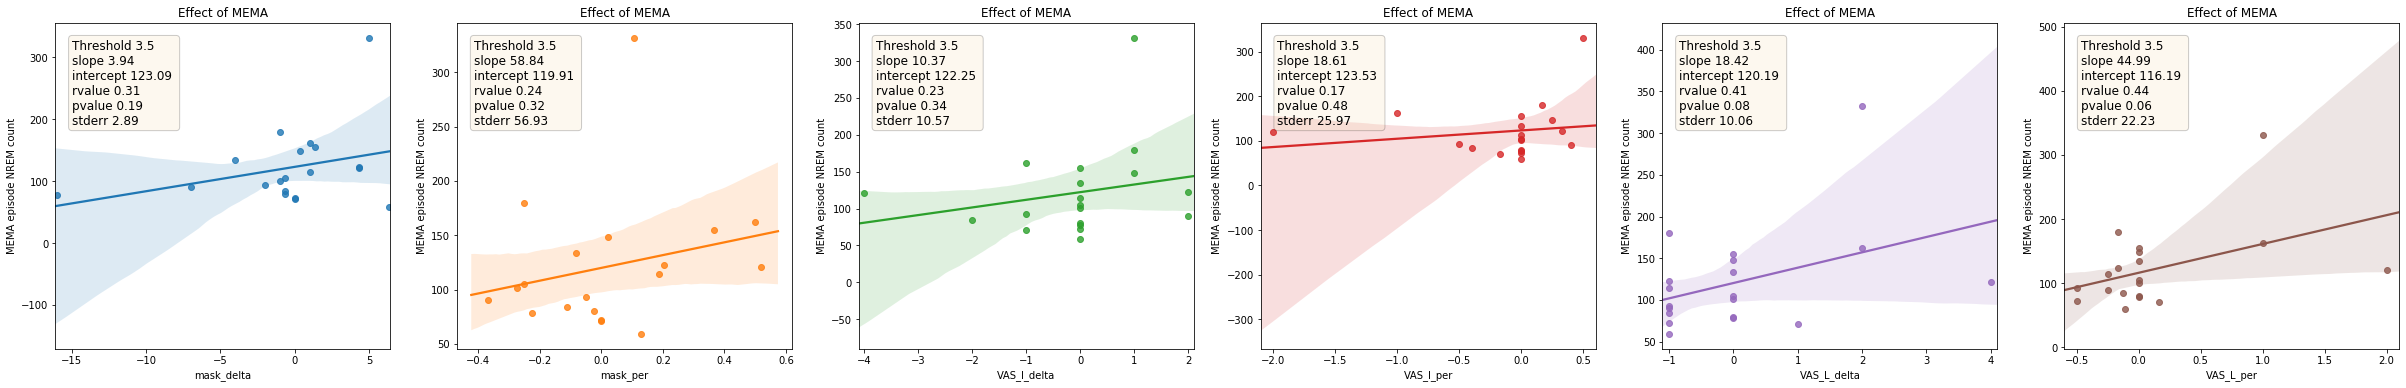

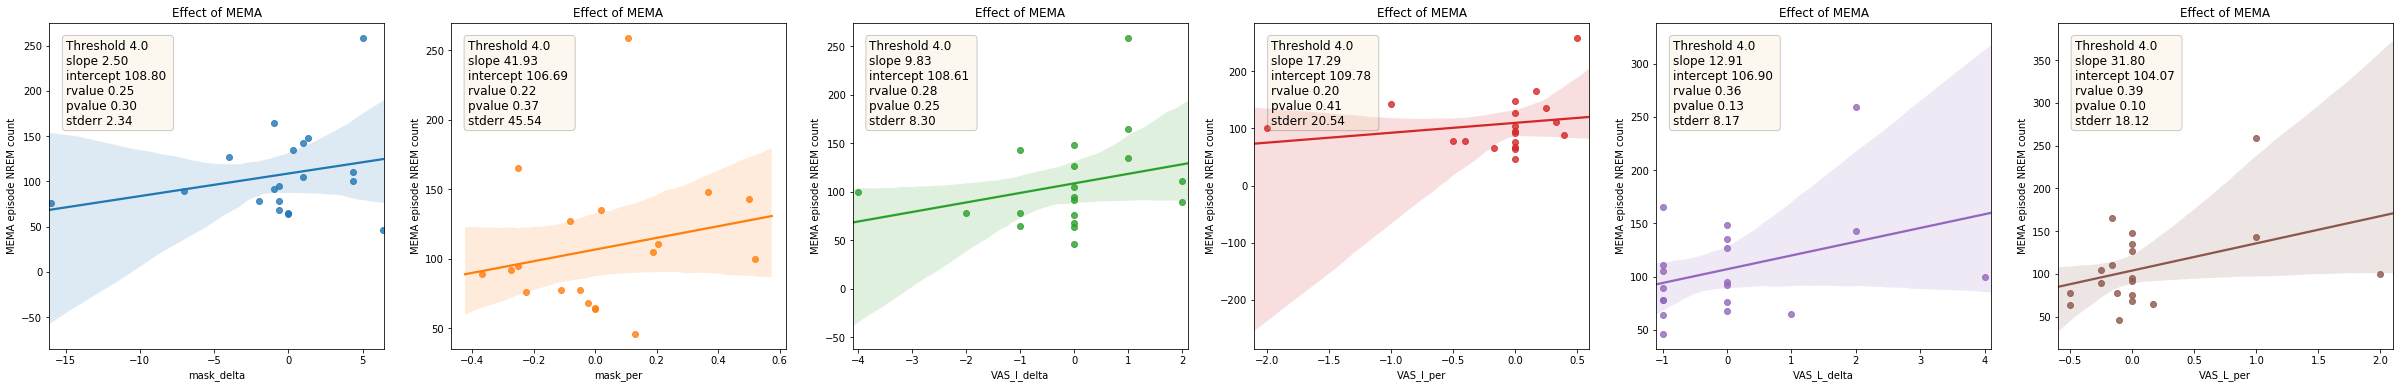

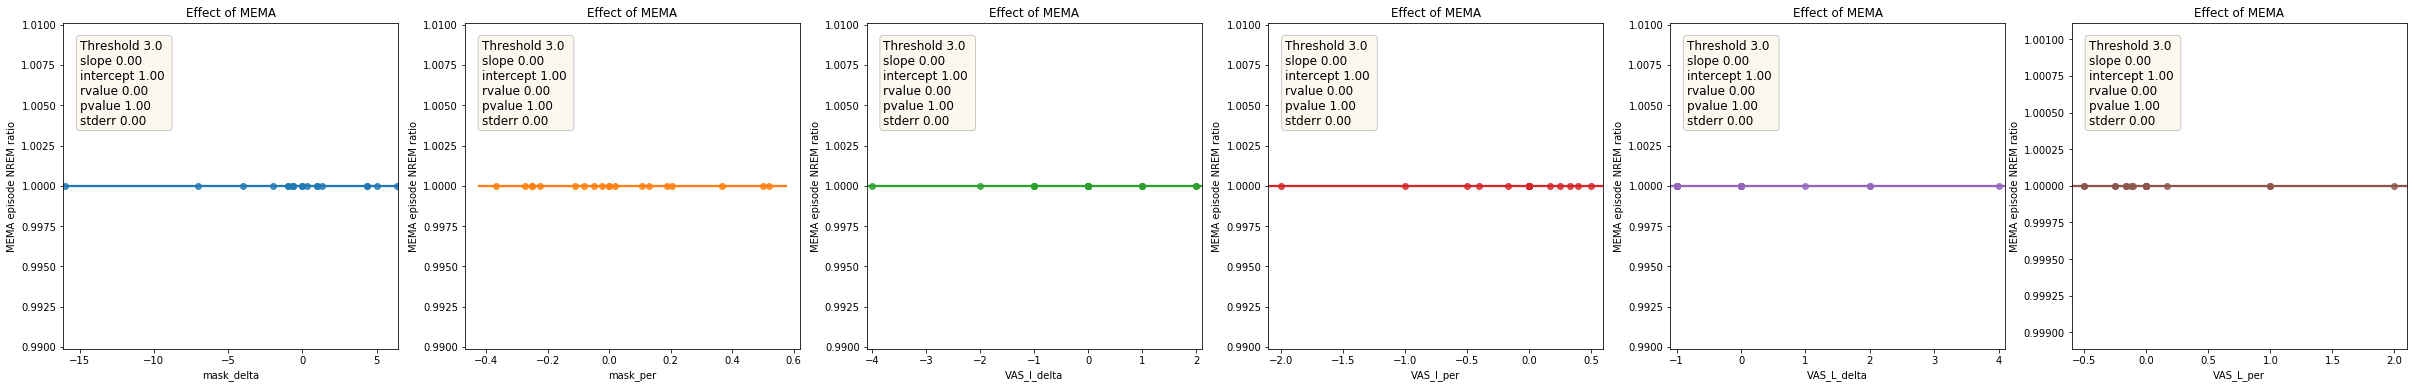

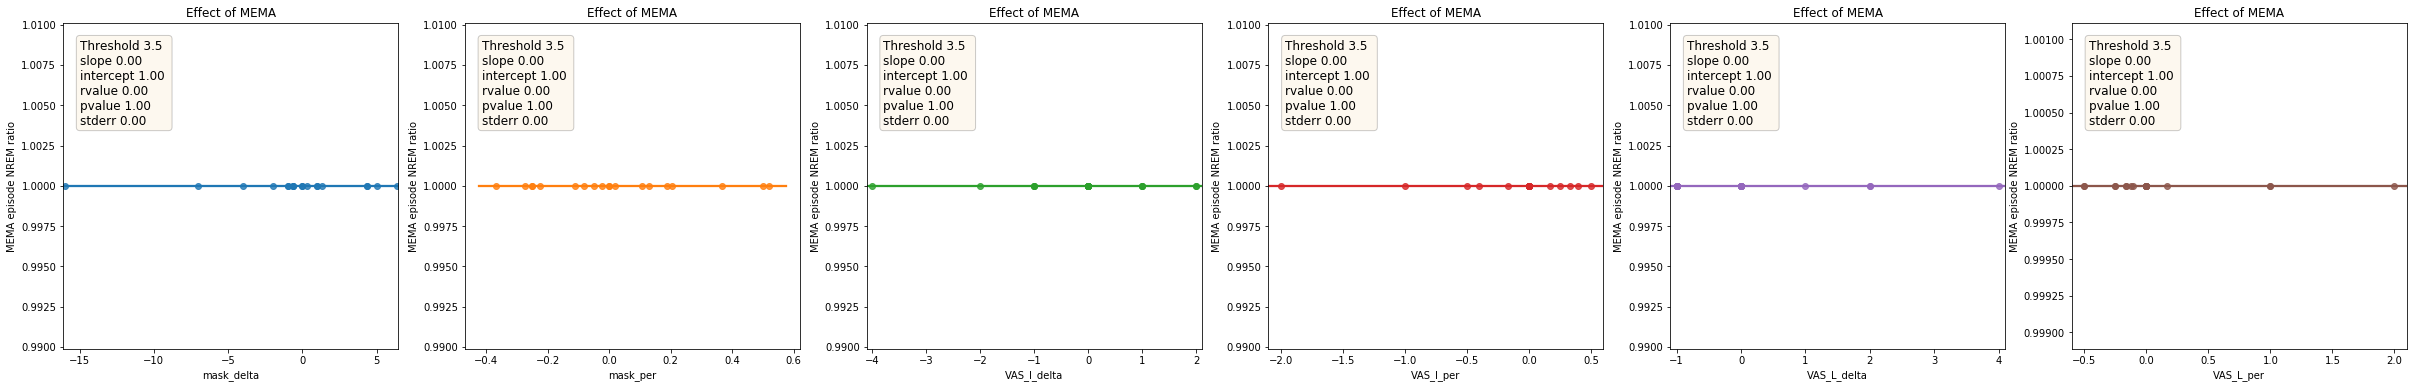

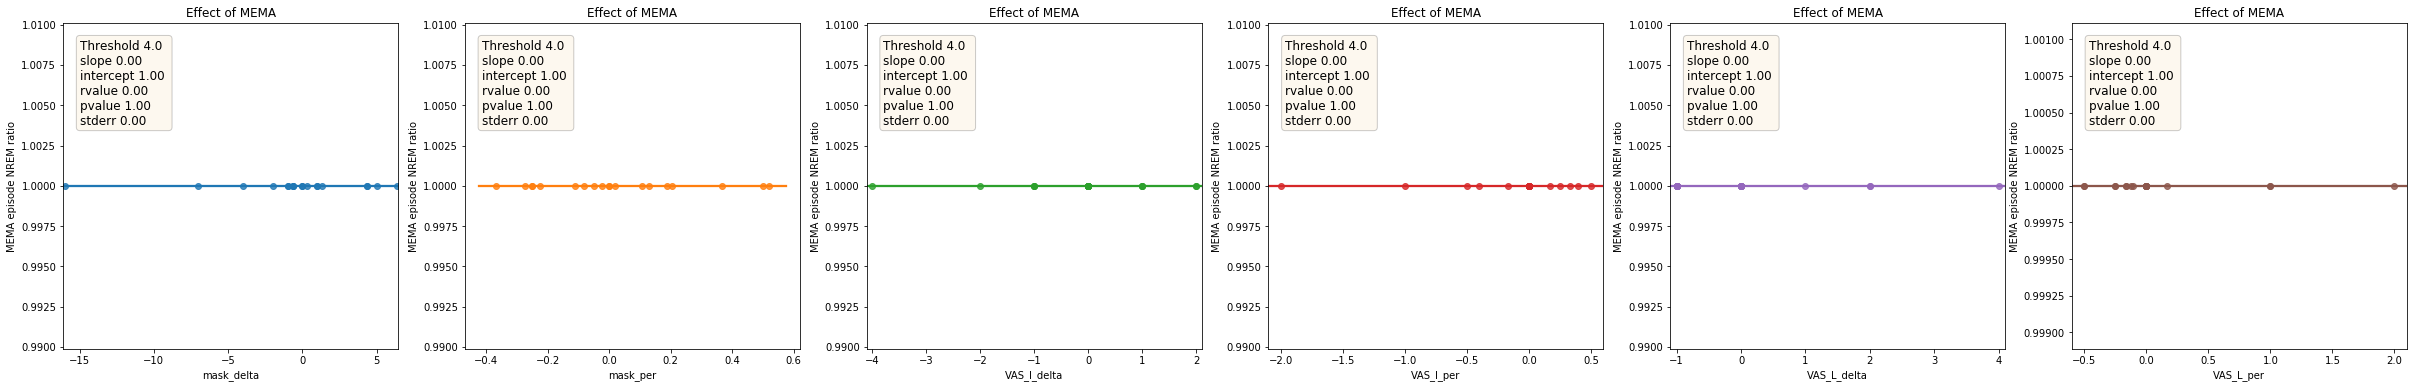

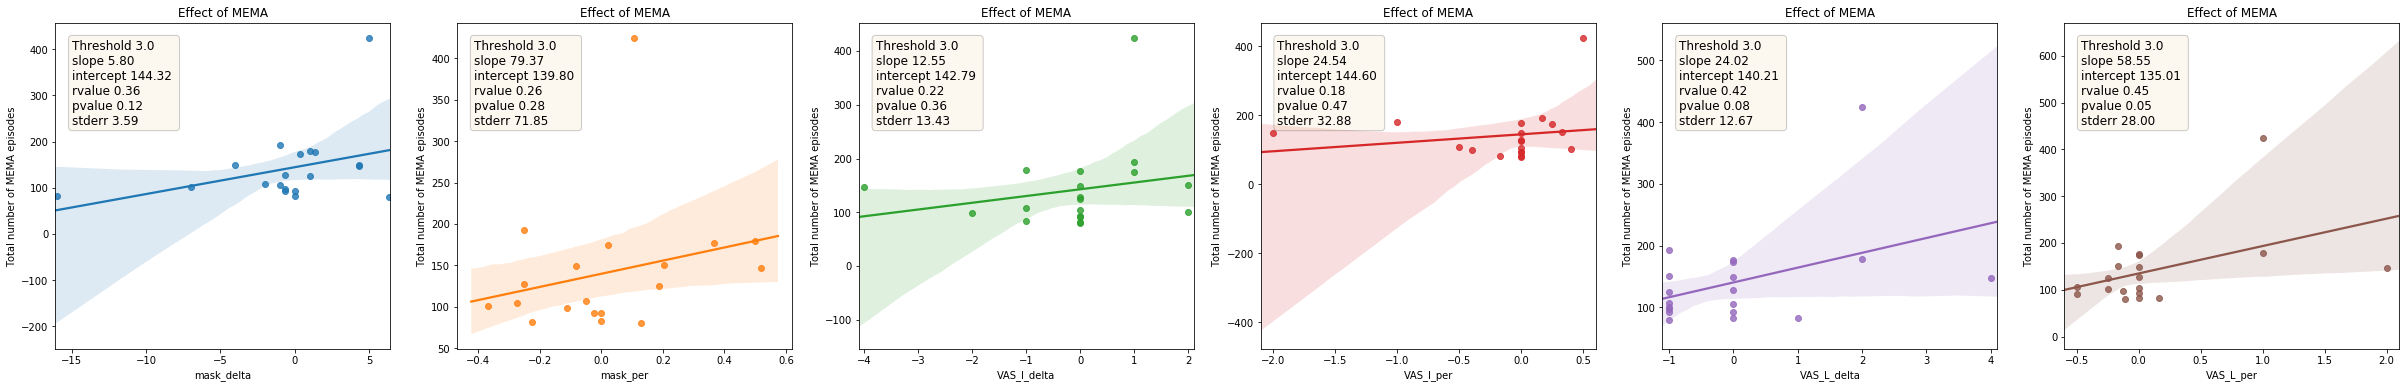

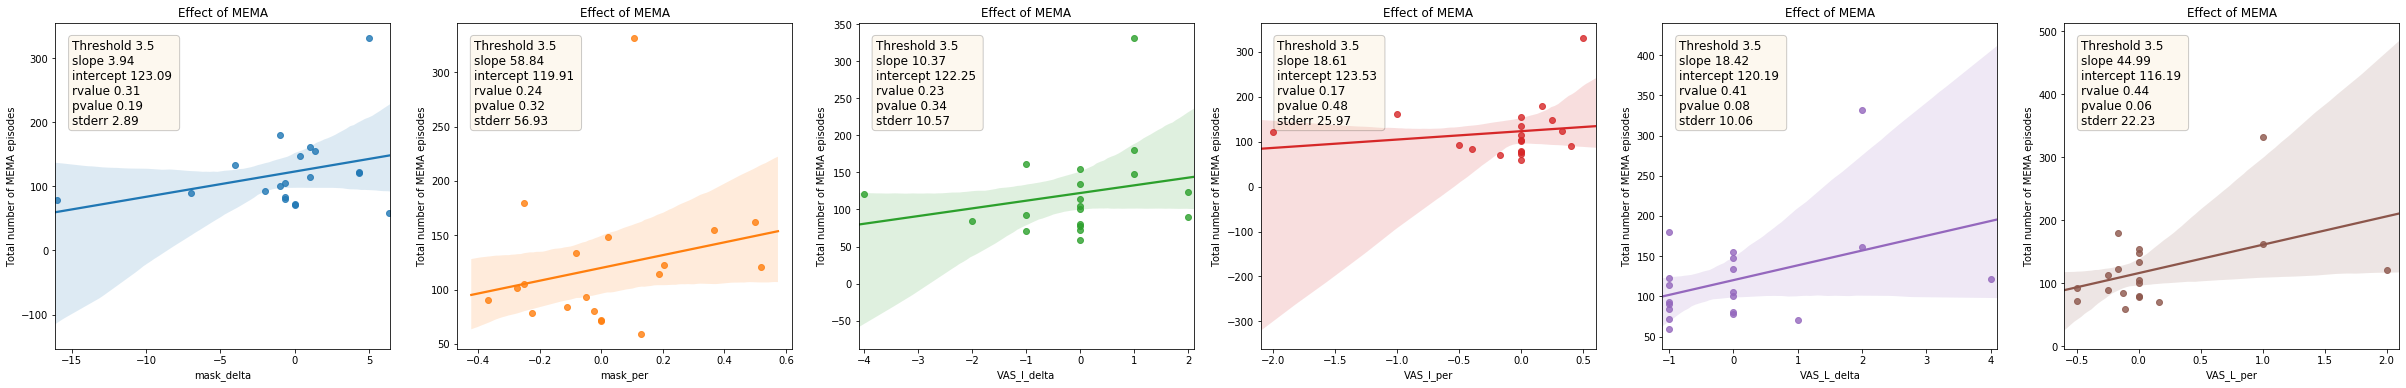

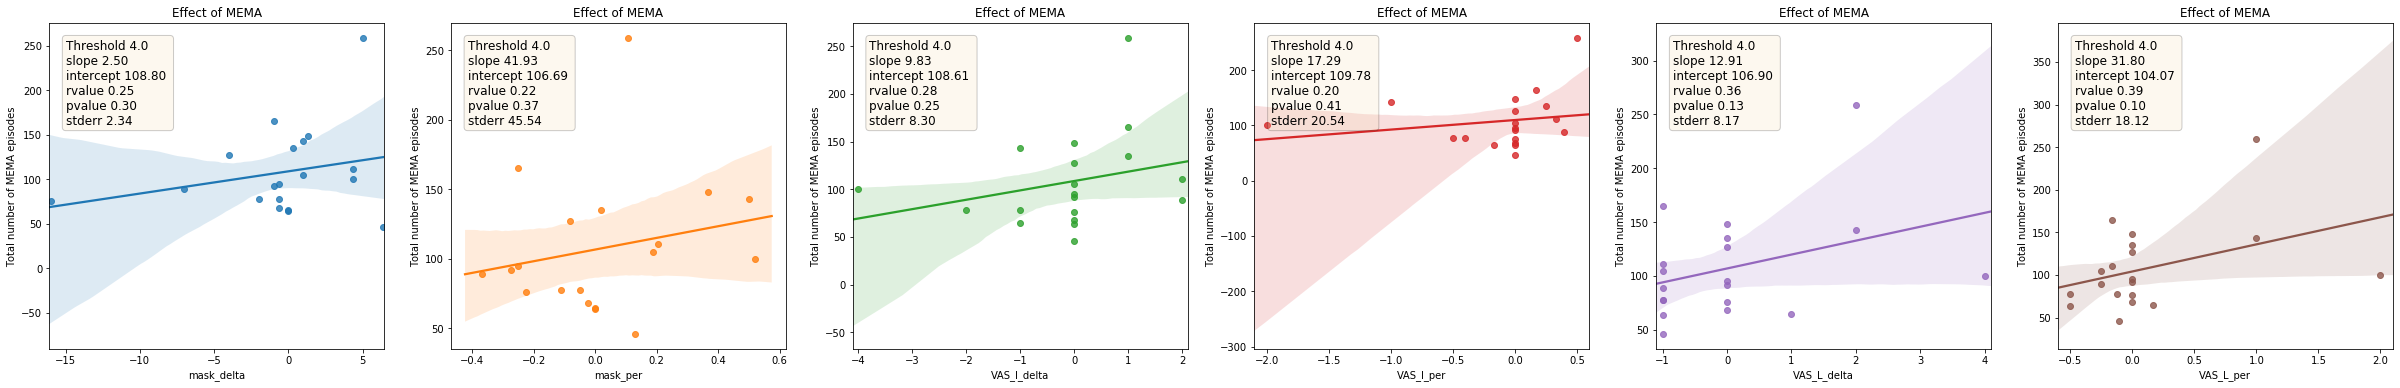

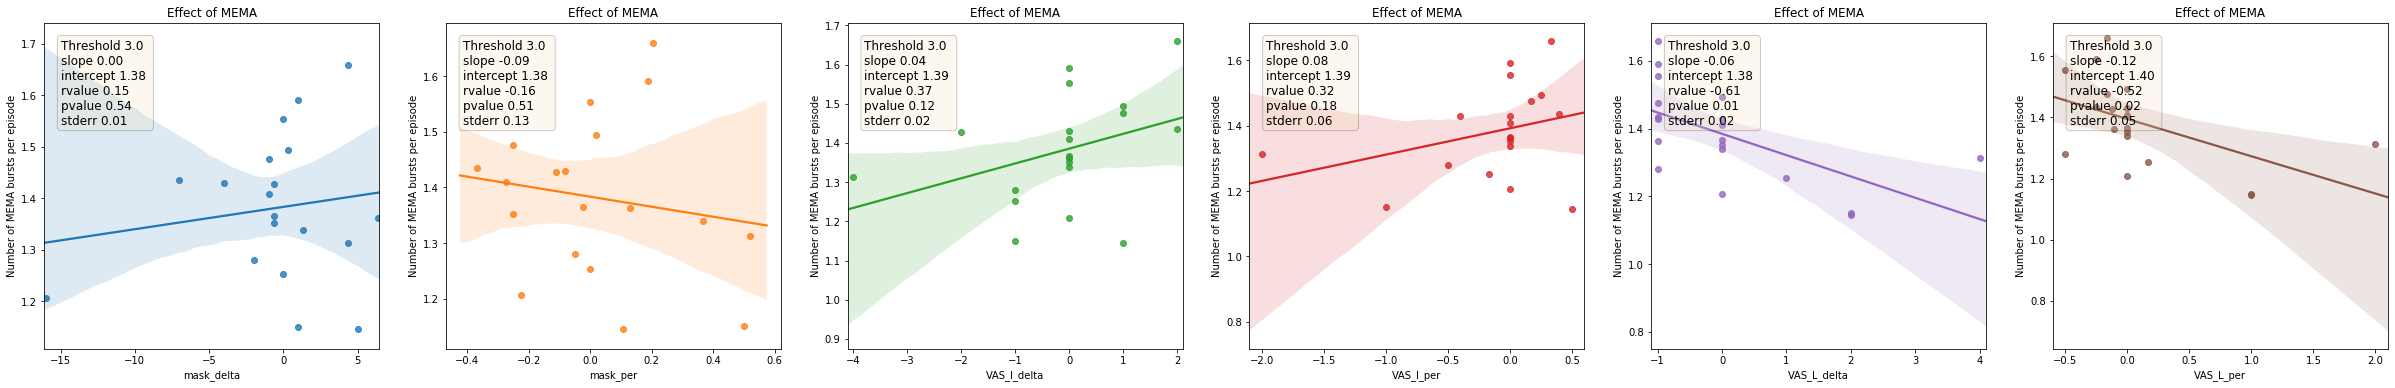

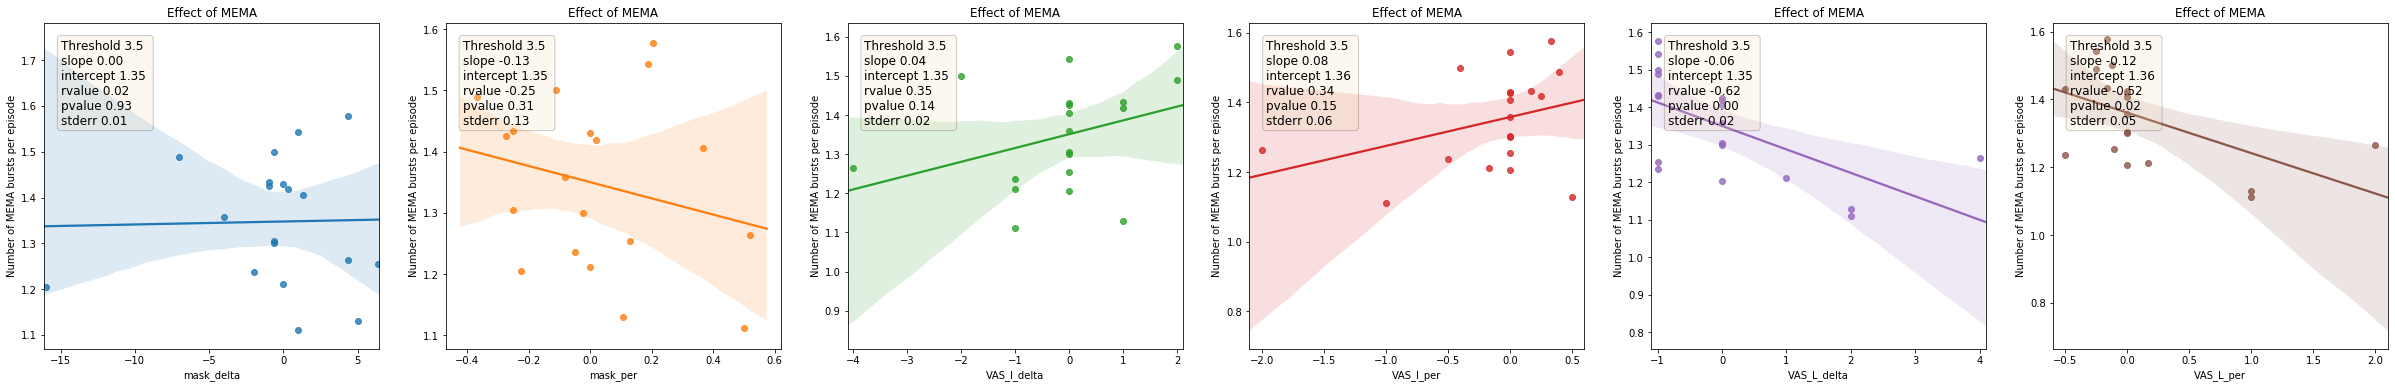

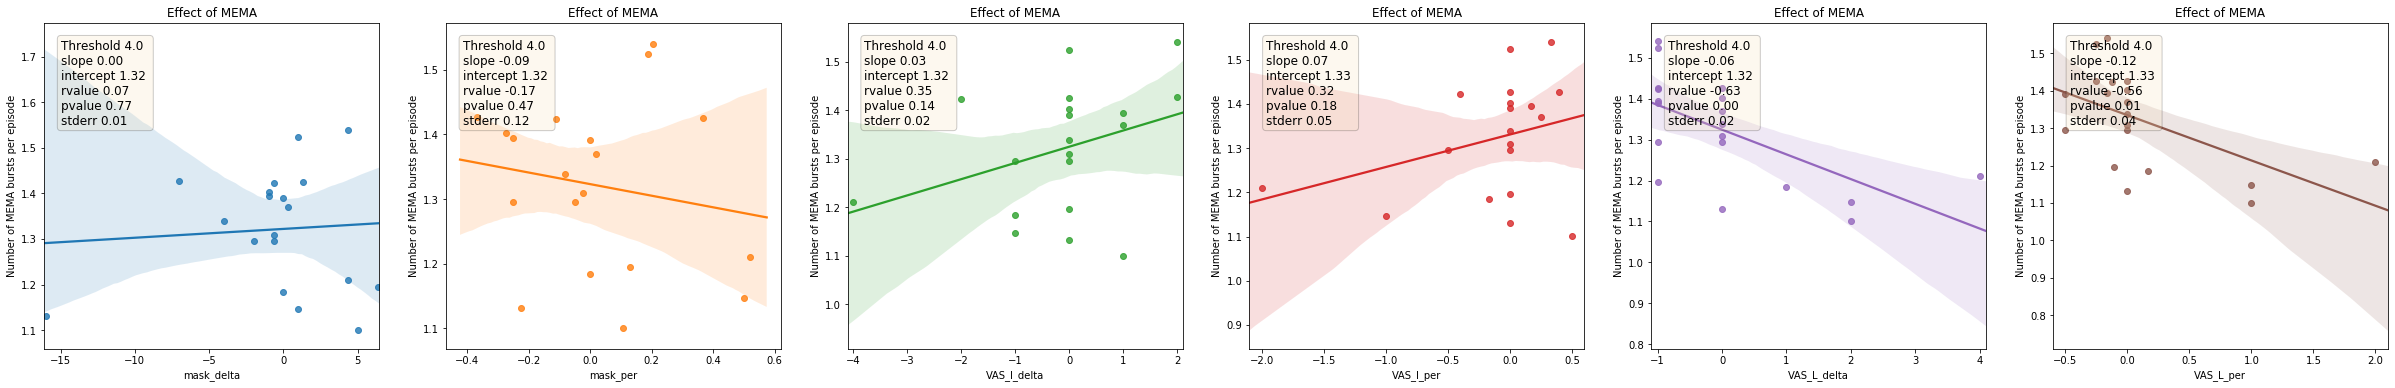

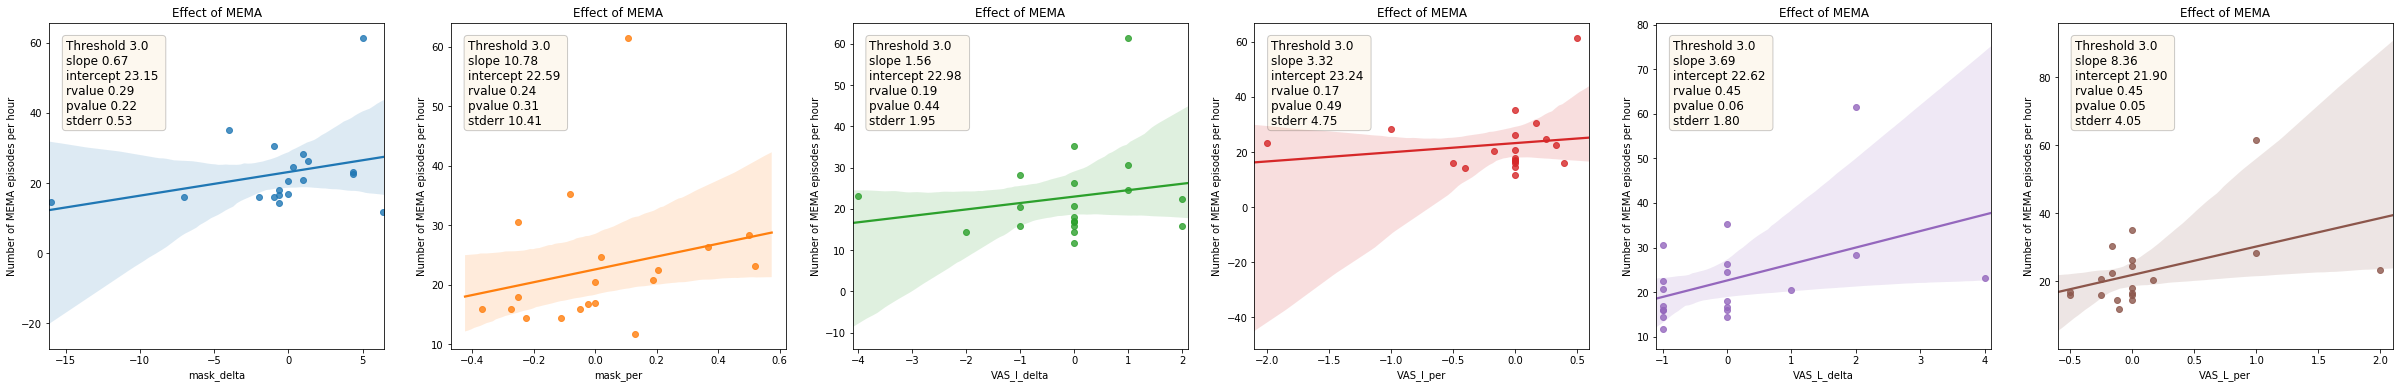

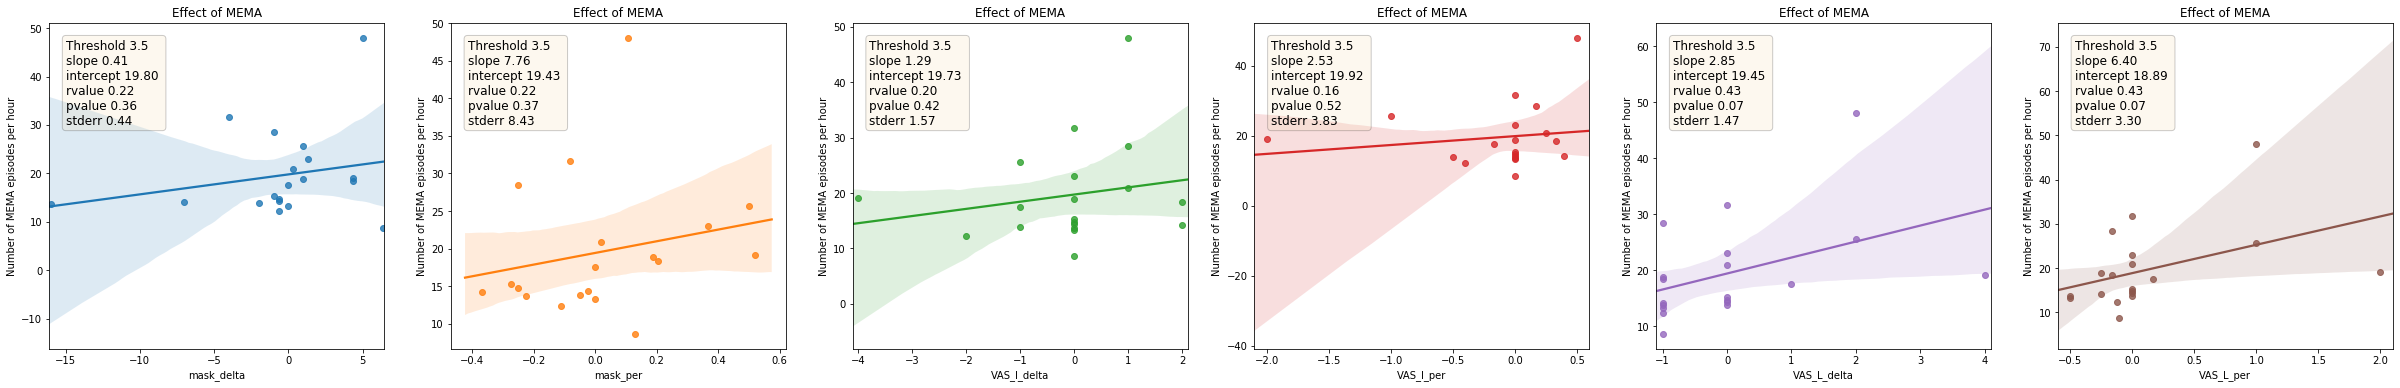

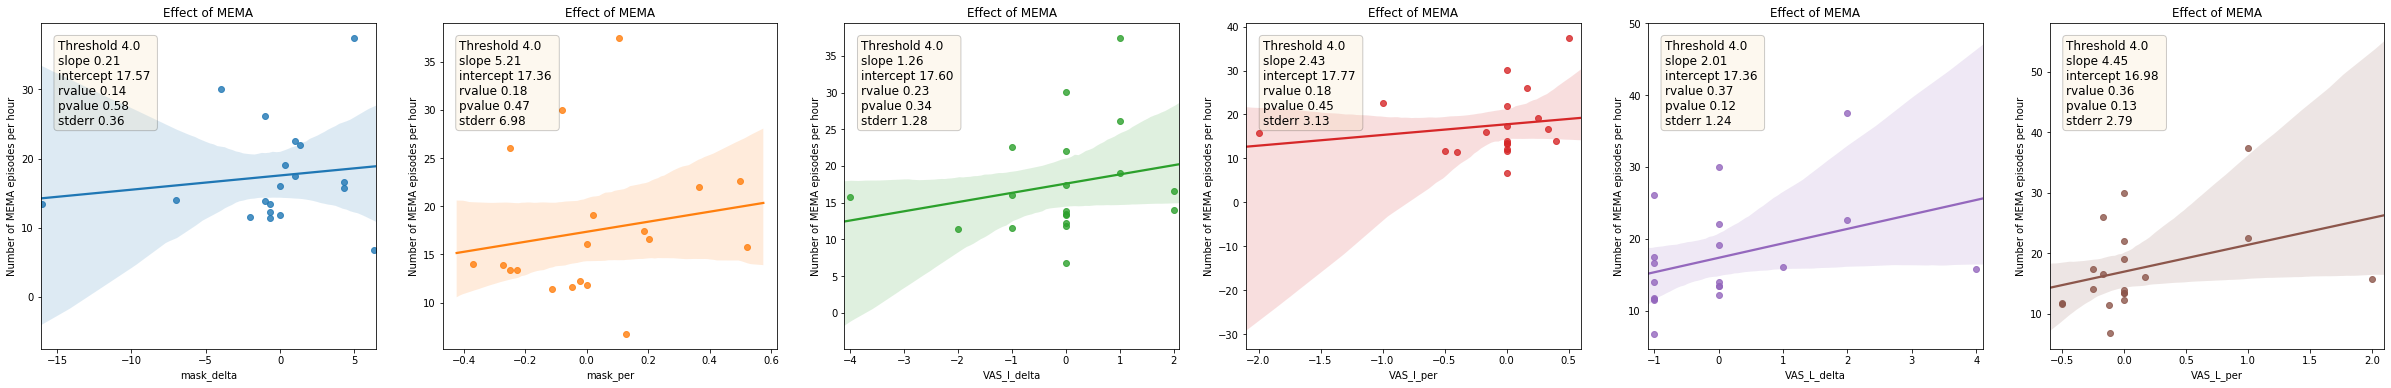

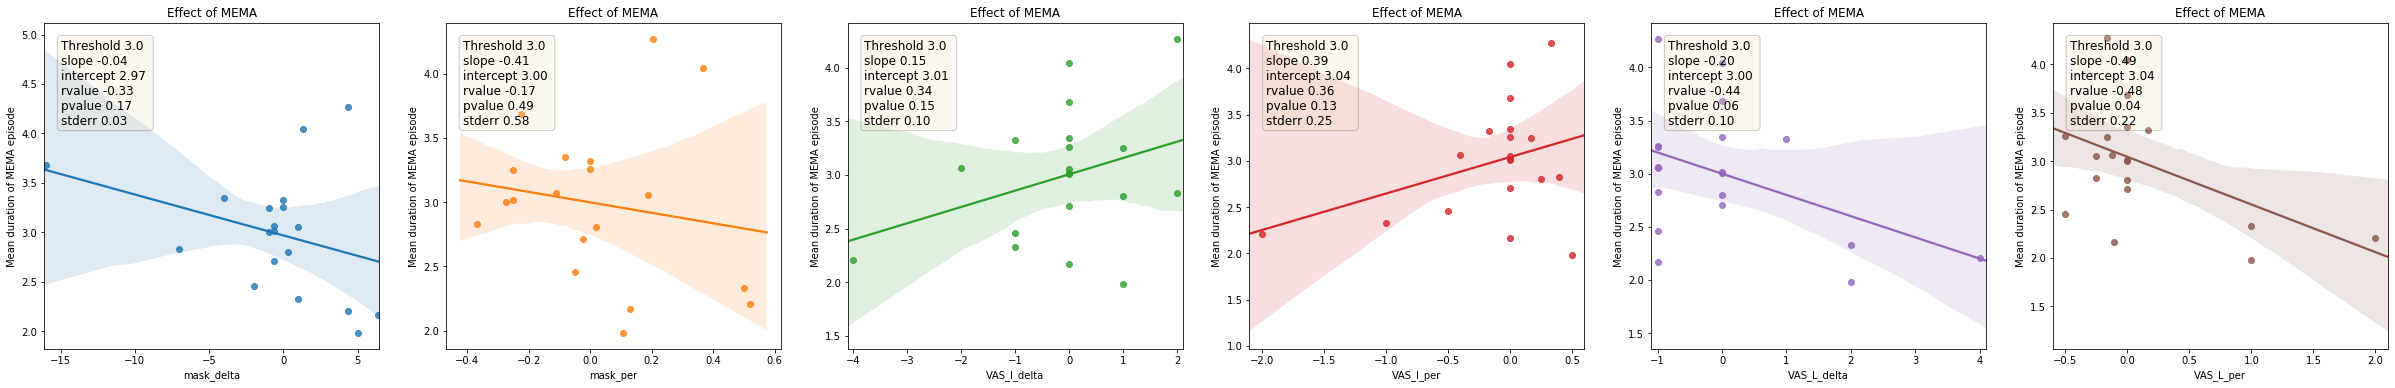

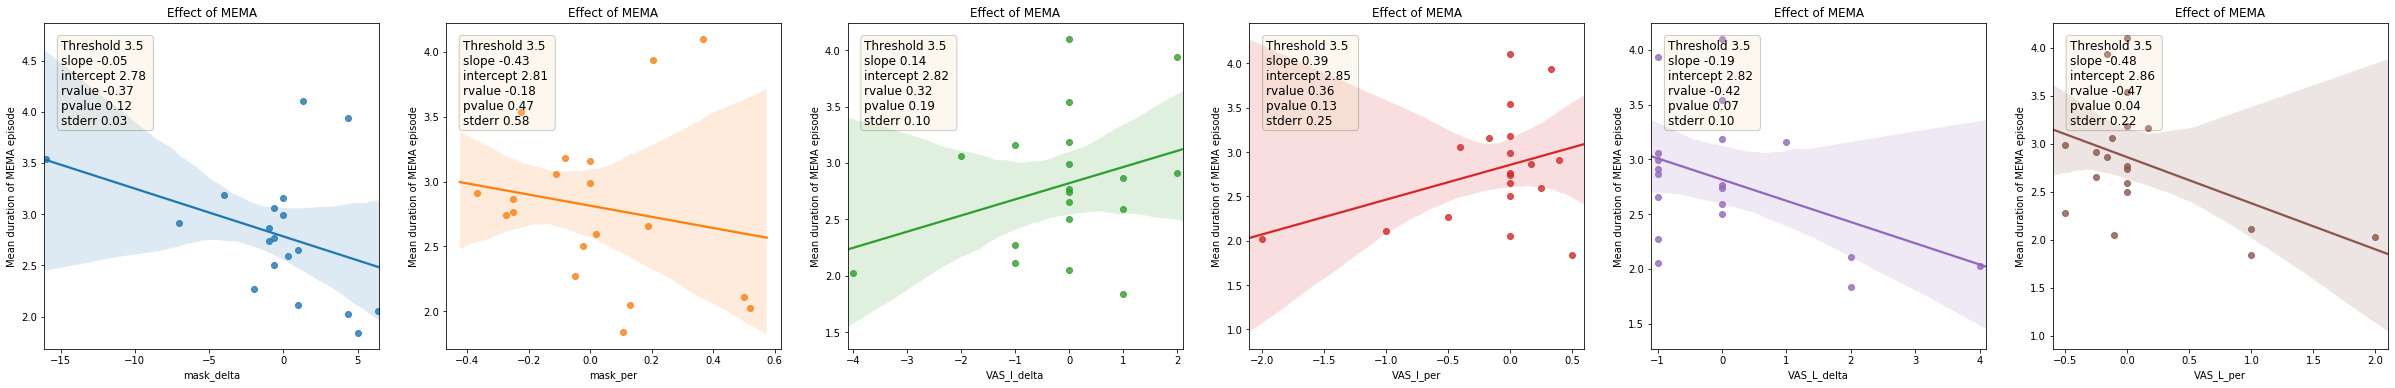

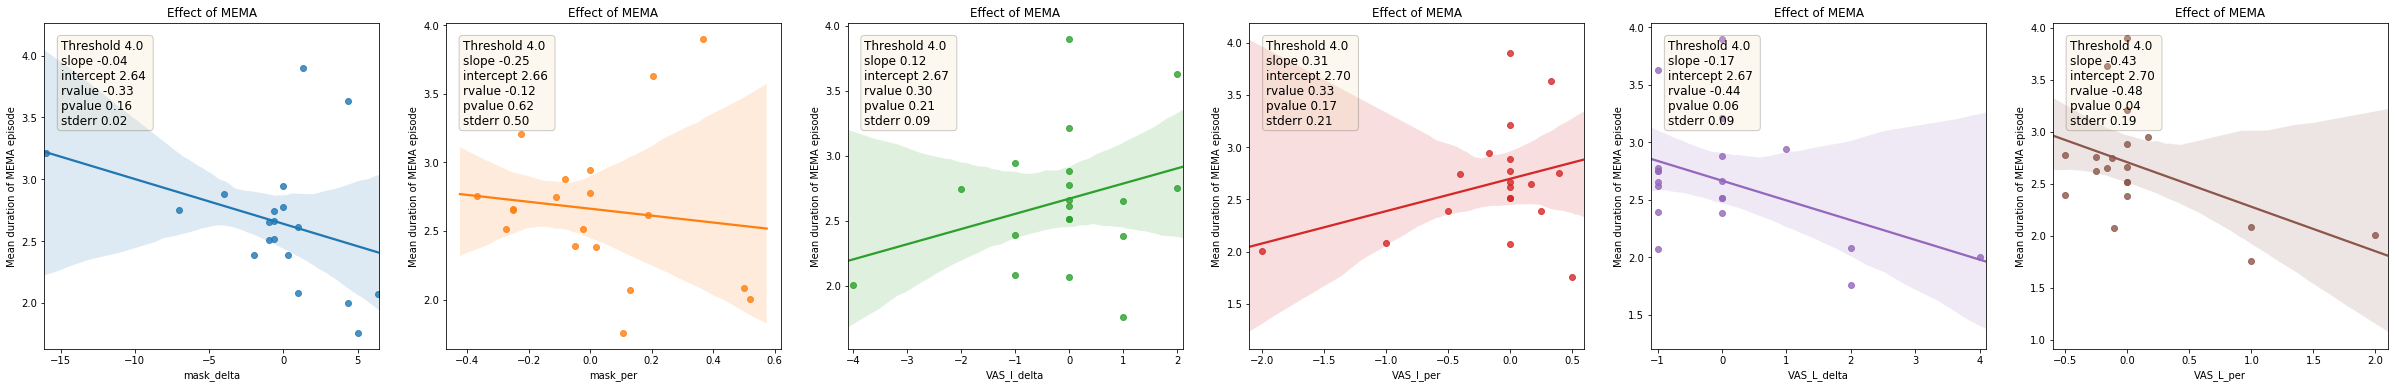

In [46]:
meta_results = pd.DataFrame()
import seaborn as sns
plt.close("all")
data = reports.query("category != 'control'")
# loop over all quantitative variables (y_axis)
for y_axis in quantitative_variables:
    # loop on all classification results (each figure)
    for threshold in reports["THR_classif"].unique():
        data_loc = data[data["THR_classif"]==threshold]
        f, axes = plt.subplots(1, len(effect_variable), figsize=(len(effect_variable)*7, 6))
        # loop on all effect variables (each subplot)
        for x_axis, ax in zip(effect_variable, axes):
            sns.regplot(x=x_axis,y=y_axis,data=data_loc,fit_reg=True, ax=ax)
            ax.set_xlim(min(data_loc[x_axis].values)-0.1,max(data_loc[x_axis].values)+0.1)
            regression_result = scipy.stats.linregress(data_loc[x_axis].values,data_loc[y_axis].values)
            tmp = {"x_axis":x_axis, "y_axis":y_axis, "THR_classif": [threshold]}
            textstr = f"Threshold {threshold:.1f} "
            for a, re in zip(regression_result._fields, regression_result):
                textstr = textstr + "\n" + f"{a} {re:.2f} "
                tmp[a] = [re]
            ax.set_title("Effect of MEMA")
            # place patch
            props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)
            ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
                    verticalalignment='top', bbox=props)
            
            # save results
            meta_results = pd.concat([meta_results, pd.DataFrame(tmp)])

In [47]:
meta_results.query("pvalue < 0.05")

,x_axis,y_axis,THR_classif,slope,intercept,rvalue,pvalue,stderr
0,VAS_L_delta,Number of MEMA bursts per episode,3.0,-0.062934,1.384867,-0.605802,0.005977,0.020046
0,VAS_L_per,Number of MEMA bursts per episode,3.0,-0.121915,1.395012,-0.521443,0.022043,0.048386
0,VAS_L_delta,Number of MEMA bursts per episode,3.5,-0.062575,1.350675,-0.617924,0.004810,0.019310
0,VAS_L_per,Number of MEMA bursts per episode,3.5,-0.119095,1.360527,-0.522561,0.021710,0.047128
0,VAS_L_delta,Number of MEMA bursts per episode,4.0,-0.060448,1.324407,-0.628814,0.003927,0.018129
0,VAS_L_per,Number of MEMA bursts per episode,4.0,-0.120908,1.334571,-0.558857,0.012871,0.043513
0,VAS_L_per,Mean duration of MEMA episode,3.0,-0.491830,3.044030,-0.481277,0.036959,0.217261
0,VAS_L_per,Mean duration of MEMA episode,3.5,-0.479983,2.858091,-0.465295,0.044697,0.221459
0,VAS_L_per,Mean duration of MEMA episode,4.0,-0.427473,2.704544,-0.484639,0.035472,0.187125
